In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
from collections import defaultdict 
# os.chdir("/Users/zyxu/Documents/R/23spring")
os.chdir("D:\OneDrive\OneDrive - UW-Madison\Kris\Code\curatedMetagenomicDataAnalyses\\notebook")
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
from pre_visz import pre_visz

In [11]:
def com_lossU(study, study_decompositions, study_decompositions_traditional, sim_study_groundTruth_Us):
    U_mask = study_decompositions[study][0]
    U_trad = study_decompositions_traditional[study][0]
    U_truth = np.array(sim_study_groundTruth_Us[study])
    diff_U_mask = U_mask - U_truth
    diff_U_trad = U_trad - U_truth

    # Compute Frobenius norms
    norm_U_mask = np.linalg.norm(U_mask, 'fro')
    norm_U_study_traditional = np.linalg.norm(U_trad, 'fro')
    norm_U_groundTruth = np.linalg.norm(U_truth, 'fro')
    norm_diff_U_study = np.linalg.norm(diff_U_mask, 'fro')
    norm_diff_U_study_traditional = np.linalg.norm(diff_U_trad, 'fro')

    return norm_U_mask, norm_U_study_traditional, norm_U_groundTruth, norm_diff_U_study, norm_diff_U_study_traditional

def com_lossV(optimized_V, study_decompositions_traditional, sim_study_ground_truth_V):
    V_study = optimized_V.detach().numpy()
    V_study_traditional = study_decompositions_traditional[study][2]

    if isinstance(sim_study_ground_truth_V, dict):
        sim_study_ground_truth_V = sim_study_ground_truth_V['V']
    V_groundTruth = np.array(sim_study_ground_truth_V)
    # Compute difference matrices
    diff_V_study = V_study - V_groundTruth
    diff_V_study_traditional = V_study_traditional - V_groundTruth

    # Compute Frobenius norms
    norm_V_study = np.linalg.norm(V_study, 'fro')
    norm_V_study_traditional = np.linalg.norm(V_study_traditional, 'fro')
    norm_V_groundTruth = np.linalg.norm(V_groundTruth, 'fro')
    norm_diff_V_study = np.linalg.norm(diff_V_study, 'fro')
    norm_diff_V_study_traditional = np.linalg.norm(diff_V_study_traditional, 'fro')

    return norm_V_study, norm_V_study_traditional, norm_V_groundTruth, norm_diff_V_study, norm_diff_V_study_traditional

(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20
(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20
(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20
(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20
(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20
(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20
(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20
(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20
(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20


In [21]:
noise_ratio_list = [0, 0.001, 0.01, 0.1, 1.0]

num_of_sim = 9

study_names = np.zeros([num_of_sim, 5])
norm_U_mask = np.zeros([num_of_sim, 5])
norm_U_trad = np.zeros([num_of_sim, 5])
norm_U_truth = np.zeros([num_of_sim, 5])
norm_diff_U_mask = np.zeros([num_of_sim, 5])
norm_diff_U_trad = np.zeros([num_of_sim, 5])

norm_V_mask = np.zeros([num_of_sim, 5])
norm_V_trad = np.zeros([num_of_sim, 5])
norm_V_truth = np.zeros([num_of_sim, 5])
norm_diff_V_mask = np.zeros([num_of_sim, 5])
norm_diff_V_trad = np.zeros([num_of_sim, 5])

# study_decompositions, study_decompositions_traditional, sim_study_groundTruth_Us, sim_study_ground_truth_V, optimized_V

for i, avg_prop in enumerate(np.arange(0.1, 1.0, 0.1)):
    file_path = save_path = f'./diff_prop_sim/avg_prop_{i+1}'
    study_decompositions, study_decompositions_traditional, sim_study_groundTruth_Us, sim_study_ground_truth_V, optimized_V = pre_visz(
        matrix_data_path = os.path.join(file_path, "sim_matrix_data.csv"), 
        study_names_path = os.path.join(file_path, "sim_study_name.csv"),
        study_ground_truth_path_Us  = os.path.join(file_path, "Us.json"),
        study_ground_truth_path_V = os.path.join(file_path, "V.json"),
        optimized_V_path = os.path.join(file_path, "output/best_V.pt")
    )
# for i, noise_ratio in enumerate(noise_ratio_list):
#     file_path = save_path = f'./diff_noise/noise_{noise_ratio}'
#     study_decompositions, study_decompositions_traditional, sim_study_groundTruth_Us, sim_study_ground_truth_V, optimized_V = pre_visz(
#         matrix_data_path = os.path.join(file_path, "sim_matrix_data.csv"), 
#         study_names_path = os.path.join(file_path, "sim_study_name.csv"),
#         study_ground_truth_path_Us  = os.path.join(file_path, "Us.json"),
#         study_ground_truth_path_V = os.path.join(file_path, "V.json"),
#         optimized_V_path = os.path.join(file_path, "output/best_V.pt")
#     )


    unique_studies = study_decompositions.keys()

    for j, study in enumerate(unique_studies):
        # study_names[i,j] = study
        norm_U_study, norm_U_study_traditional, norm_U_groundTruth, norm_diff_U_study, norm_diff_U_study_traditional = com_lossU(
            study, study_decompositions, study_decompositions_traditional, sim_study_groundTruth_Us)
        norm_V_study, norm_V_study_traditional, norm_V_groundTruth, norm_diff_V_study, norm_diff_V_study_traditional = com_lossV(
            optimized_V, study_decompositions_traditional, sim_study_ground_truth_V)

        norm_U_mask[i,j] = norm_U_study
        norm_U_trad[i,j] = norm_U_study_traditional
        norm_U_truth[i,j] = norm_U_groundTruth
        norm_diff_U_mask[i,j] = norm_diff_U_study
        norm_diff_U_trad[i,j] = norm_diff_U_study_traditional

        norm_V_mask[i,j] = norm_V_study
        norm_V_trad[i,j] = norm_V_study_traditional
        norm_V_truth[i,j] = norm_V_groundTruth
        norm_diff_V_mask[i,j] = norm_diff_V_study
        norm_diff_V_trad[i,j] = norm_diff_V_study_traditional


(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20
(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20
(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20
(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20
(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20
(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20
(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20
(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20
(100, 200)
(150, 200)
(200, 200)
(250, 200)
(300, 200)
rank:  20


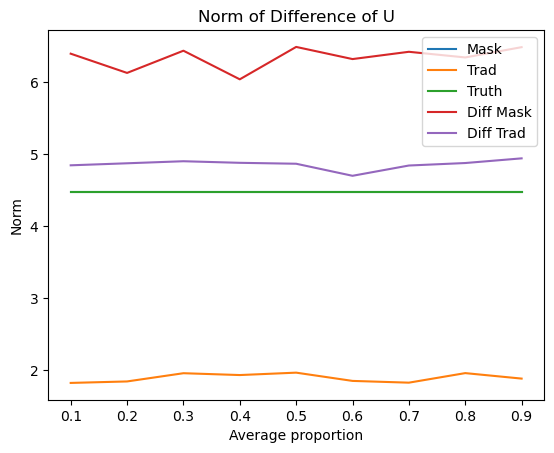

In [22]:
# Create x values (assuming a simple range from 1 to 10)
props = np.arange(0.1, 1.0, 0.1)
# props = noise_ratio_list

# Plot the curves using different colors
plt.plot(props, np.mean(norm_U_mask, axis=1), label='Mask')
plt.plot(props, np.mean(norm_U_trad, axis=1), label='Trad')
plt.plot(props, np.mean(norm_U_truth, axis=1), label='Truth')
plt.plot(props, np.mean(norm_diff_U_mask, axis=1), label='Diff Mask')
plt.plot(props, np.mean(norm_diff_U_trad, axis=1), label='Diff Trad')


# Add labels, title, and a legend
plt.xlabel('Average proportion')
plt.ylabel('Norm')
plt.title('Norm of Difference of U')
# plt.ylim([0,8])
# plt.xscale('log')
plt.legend()

# Display the plot
plt.show()

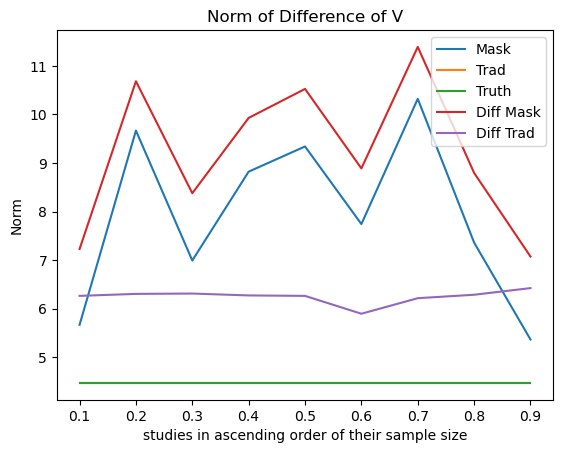

In [23]:
# Create x values (assuming a simple range from 1 to 10)
props = np.arange(0.1, 1.0, 0.1)
# props = noise_ratio_list

# Plot the curves using different colors
plt.plot(props, np.mean(norm_V_mask, axis=1), label='Mask')
plt.plot(props, np.mean(norm_V_trad, axis=1), label='Trad')
plt.plot(props, np.mean(norm_V_truth, axis=1), label='Truth')
plt.plot(props, np.mean(norm_diff_V_mask, axis=1), label='Diff Mask')
plt.plot(props, np.mean(norm_diff_V_trad, axis=1), label='Diff Trad')

# Add labels, title, and a legend
plt.xlabel('studies in ascending order of their sample size')
plt.ylabel('Norm')
plt.title('Norm of Difference of V')
# plt.ylim([0,8])
# plt.xscale('log')
plt.legend()


# Display the plot
plt.show()

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample study

def plot_study_U(study):
    U_mask = study_decompositions[study][0]
    U_trad = study_decompositions_traditional[study][0]
    # U_difference = U_mask - U_trad
    U_truth = np.array(sim_study_groundTruth_Us[study])

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Heatmap of U from study_decompositions
    sns.heatmap(U_mask, ax=axes[0], cmap='coolwarm', cbar=False)
    axes[0].set_title('U from study_decompositions')

    # Heatmap of U from study_decompositions_traditional
    sns.heatmap(U_trad, ax=axes[1], cmap='coolwarm', cbar=False)
    axes[1].set_title('U from study_decompositions_traditional')

    # Ground truth U
    sns.heatmap(U_truth, ax=axes[2], cmap='coolwarm')
    axes[2].set_title('Ground truth U matrices')

    # Heatmap of the difference
    # sns.heatmap(U_difference, ax=axes[2], cmap='coolwarm')
    # axes[2].set_title('Difference between U matrices')



    plt.tight_layout(pad=1.0)
    plt.show()

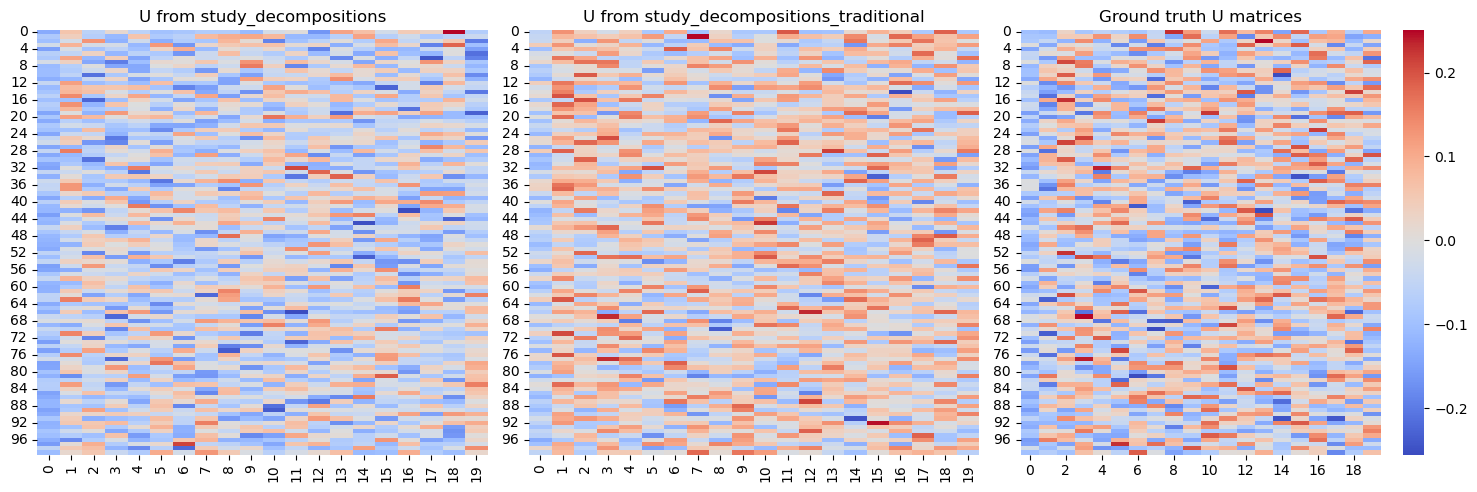

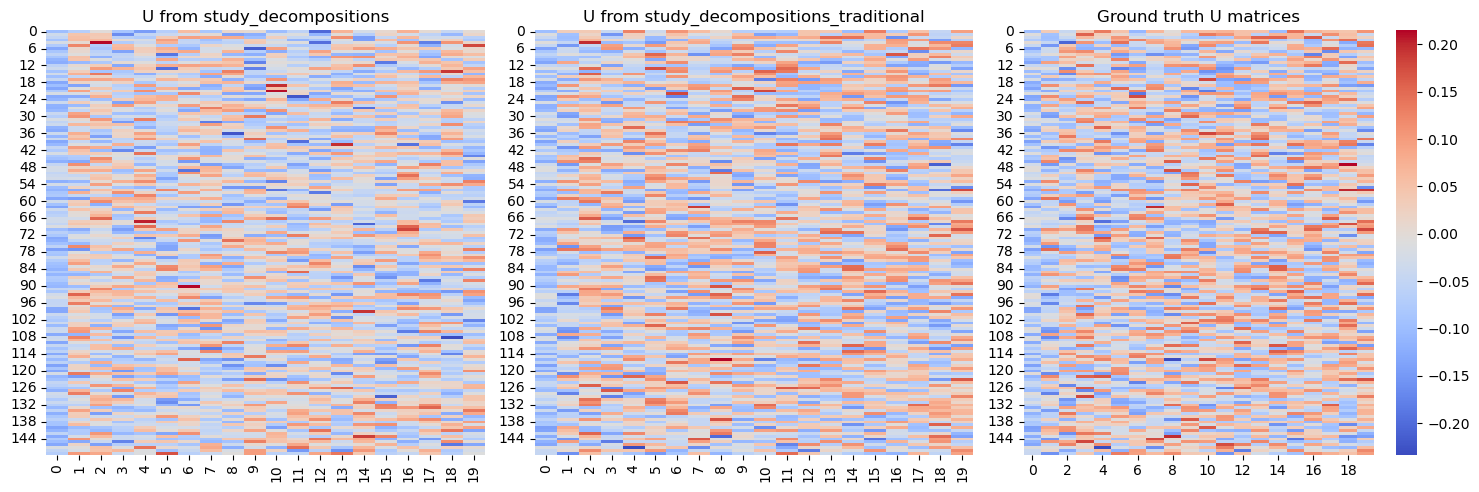

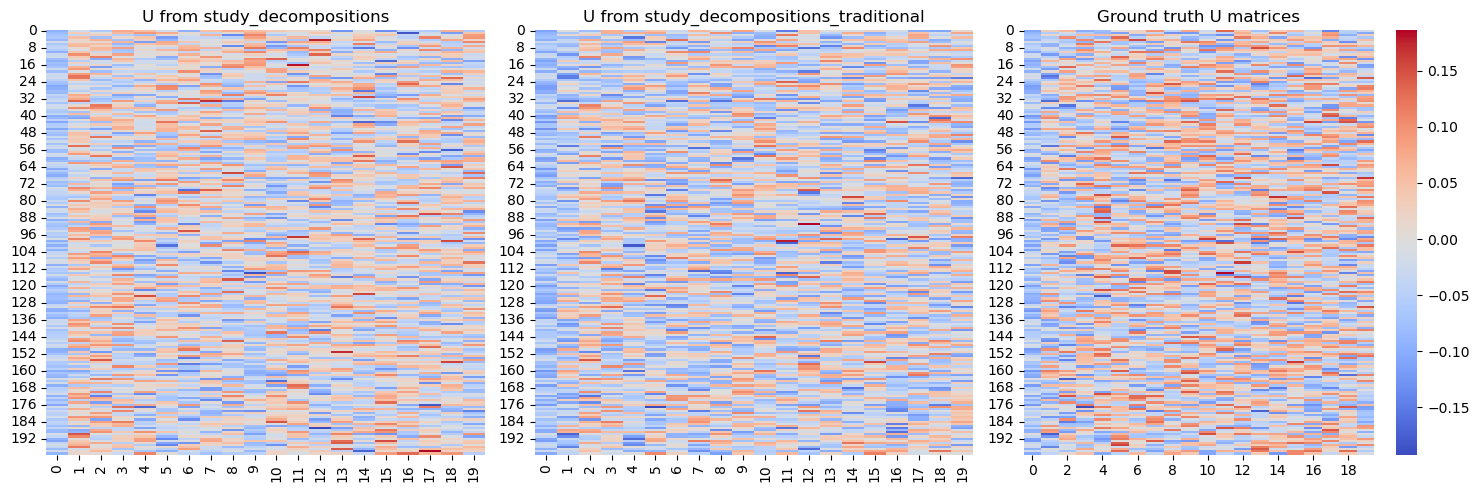

KeyboardInterrupt: 

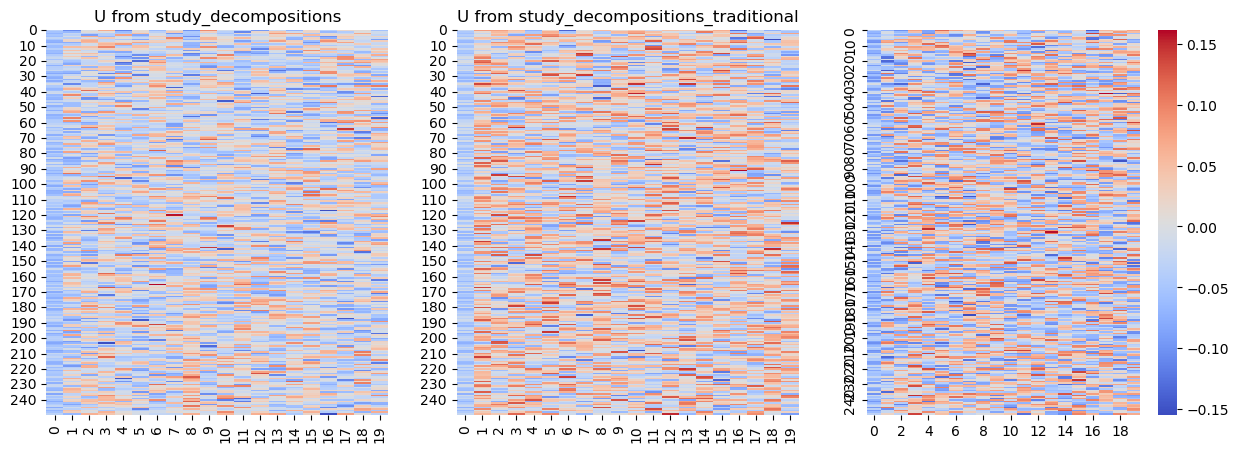

In [13]:
for study in unique_studies:
    plot_study_U(study)

In [ ]:
import pandas as pd
pd.DataFrame(loss)

,study,ours,SVD
0,A,6.107140,6.158457
1,B,6.117442,5.311662
2,C,6.156957,6.675255
3,D,6.600473,5.728456
4,E,6.265716,5.980590
